<a href="https://colab.research.google.com/github/HIsu1231/AI_INOVATION_SQUARE/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1

In [ ]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

In [ ]:
x_data = np.array([1.0,2.0,3.0,4.0,5.0]).reshape(5,1)
t_data = np.array([2.0,3.0,4.0,5.0,6.0]).reshape(5,1)
n = len(x_data)

In [ ]:
W = np.random.rand(1,1)
b = np.random.rand(1)

In [ ]:
def numerical_derivative(f,x):
    delta_x = 1e-4
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags = ['multi_index'], op_flags = ['readwrite'])
    
    while not it.finished:
        idx = it.multi_index
        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x)   #f(x+delta_x)
        
        x[idx] = tmp_val - delta_x
        fx2 = f(x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val
        it.iternext()
    
    return grad 

In [ ]:
def loss_func(x,t):
    y = np.dot(x,W) + b
    return (np.sum((t-y)**2))/n

In [ ]:
def predict(x):
    y = np.dot(x,W) + b
    return y

In [ ]:
learning_rate = 1e-2

f = lambda x: loss_func(x_data, t_data)

print("initial loss value = ", loss_func(x_data, t_data), "initial W = ", W, "\n", ", b =",b)

for step in range(10001):
    W -= learning_rate * numerical_derivative(f,W)
    
    b -= learning_rate * numerical_derivative(f,b)
    
    if (step%1000 == 0):
        print("step = ", step, "loss value = ", loss_func(x_data,t_data), "W = ",W," b = ",b)

In [ ]:
predict(np.array([43]))

#2

In [ ]:
def numerical_derivative(f,x):
    delta_x = 1e-4
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags = ['multi_index'], op_flags = ['readwrite'])
    
    while not it.finished:
        idx = it.multi_index
        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x)   #f(x+delta_x)
        
        x[idx] = tmp_val - delta_x
        fx2 = f(x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val
        it.iternext()
    
    return grad 

In [ ]:
loaded_data = np.loadtxt('./../(200221)data-01.csv', delimiter=',', dtype=np.float32)

x_data = loaded_data[:, 0:-1]
t_data = loaded_data[:,[-1]]

W = np.random.rand(3,1)
b = np.random.rand(1)

In [ ]:
def loss_func(x,t):
    y = np.dot(x,W)+b
    return (np.sum((t-y)**2))/(len(x))

In [ ]:
def predict(x):
    y = np.dot(x,W) + b
    return y

In [ ]:
learning_rate = 1e-5

f = lambda x: loss_func(x_data,t_data)

for step in range(40001):
    
    W -= learning_rate*numerical_derivative(f,W)
    b -= learning_rate*numerical_derivative(f,b)
    
    if (step%400 == 0):
        print("step = ", step, "loss value = ",loss_func(x_data,t_data), "W = ",W, "b = ",b)

#3, #4

In [ ]:
def numerical_derivative(f,x):
    delta_x = 1e-4
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags = ['multi_index'], op_flags = ['readwrite'])
    
    while not it.finished:
        idx = it.multi_index
        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x)   #f(x+delta_x)
        
        x[idx] = tmp_val - delta_x
        fx2 = f(x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val
        it.iternext()
    
    return grad 

In [ ]:
loaded_data = np.loadtxt("./../(200302)sps.csv", delimiter=',', dtype=np.float32)

x_data = loaded_data[:, 1:]
t_data = loaded_data[:, [0]]

print("x_data.shape = ",x_data.shape, ", t_data.shape = ", t_data.shape)

W = np.random.rand(len(x_data[1]),1)
b = np.random.rand(1)

print("W.shape = ", W.shape, ", b.shape = ", b.shape)

In [ ]:
def loss_func(x,t):
    y = np.dot(x,W) + b
    return np.sum((t-y)**2)/len(x)

In [ ]:
def predict(x):
    return np.dot(x,W) + b  

In [ ]:
learning_rate = 1e-5

f = lambda x: loss_func(x_data,t_data)

loss_val_list = []

for step in range(40001):
    W -= learning_rate*numerical_derivative(f,W)
    b -= learning_rate*numerical_derivative(f,b)
    
    if (step % 1000 == 0):
        print("step = ", step, ", loss value = ", loss_func(x_data,t_data))
        loss_val_list.append(loss_func(x_data, t_data))

In [ ]:
test_data = np.array([[4,4,4,4],[-3,0,9,-1],[-7,-9,-2,8],
                      [1,-2,3,-2],[19,-12,0,-76],[2001,-1,109,31],[-1,102,-200,1000]])

In [ ]:
for i in test_data:
    print("predicted value = ",predict(i),"\n")

In [ ]:
plt.title('Loss Value Trend')
plt.xlabel('epochs ( X 1000)')
plt.ylabel('loss value')
plt.grid()

plt.plot(loss_val_list)
plt.show()

#5, #6

In [ ]:
# 수치미분

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

In [ ]:
class LinearRegressionTest:
    
    def __init__(self):
        print("LinearRegressionTest Object is created")
        
    def get_W_b(self):
        return self.W, self.b
    
    def loss_func(self, xdata, tdata):
        y = np.dot(xdata, self.W) + self.b
        return np.sum((y-tdata)**2)/len(xdata)
    
    def predict(self,test_data):
        return np.dot(test_data,self.w) + self.b
    
    def train(self, xdata, tdata, learning_rate, iteration_count):
        self.W = np.random.rand(xdata.shape[-1],1)
        self.b= np.random.rand(1)
        
        f = lambda x: self.loss_func(xdata,tdata)
        
        for step in range(iteration_count):
            
            self.W -= learning_rate * numerical_derivative(f,self.W)
            self.b -= learning_rate * numerical_derivative(f,self.b)
            
            if(step%int(iteration_count*0.05) == 0):
                print("step = ", step, "loss value = ", self.loss_func(xdata,tdata))

In [ ]:
try:
    
    loaded_data = np.loadtxt("통합문서1.xlsx", delimiter=',', dtype=np.float32)
    
    x_data = loaded_data[:,1:]
    t_data = loaded_data[:,[0]]
    
except FileNotFoundError as err:
        print(str(err))
except Exception as err:
        print(str(err))

In [ ]:
obj1 = LinearRegressionTest()

obj1.train(x_data, t_data, 1e-3, 20001)

#5

In [ ]:
try:
    training_data = np.loadtxt("./../../통합 문서1.xlsx", delimiter = ',', dtype = np.float32)
    x_data = training_data[:, 1:]
    t_data = training_data[:, [0]]
    
except FileNotFoundError as err:
        print(str(err))
except Exception as err:
        print(str(err))

'cp949' codec can't decode byte 0xe1 in position 16: illegal multibyte sequence


In [ ]:
class LinearRegressionTest:
    
    def __init__(self, xdata, tdata, learning_rate, iteration_count):
        print("The object is created")
        
        self.xdata = xdata
        self.tdata = tdata
        
        self.learning_rate = learning_rate
        self.iteration_count = iteration_count
        
        self.W = np.random.rand(self.xdata.shape[1],1)
        self.b = np.random.rand(1)
        
    def get_W_b(self):
        return self.W, self.b
    
    def loss_val(self):
        y = np.dot(self.xdata,self.W) + self.b
        return np.sum((y-self.tdata)**2)/len(self.xdata)
    
    
    def predict(self,test_data):
        y = np.dot(test_data,self.W) +sefl.b
        return y
    
    def train(self):
        
        f = lambda x: self.loss_val()
        
        for step in range(self.iteration_count):
            self.W -= self.learning_rate * numerical_derivative(f, self.W)
            self.b -= self.learning_rate * numerical_derivative(f, self.b)
            
            if(step % int(self.iteration_count*0.5)==0):
                print("step = ",step,"loss value = ",self.loss_val(),"W = ",self.W, "b = ",self.b)        
    

In [ ]:
obj = LinearRegressionTest(x_data, t_data, 1e-5, 100001)

In [ ]:
obj.train()

In [ ]:
training_data = np.loadtxt("./../(200302)sps.csv", delimiter=',',dtype=np.float)
x_data = training_data[:, 1:]
t_data = training_data[:,[0]]

print("x_data.shape = ",x_data.shape, "t_data = ", t_data.shape)

x_data.shape =  (50, 4) t_data =  (50, 1)


In [ ]:
class LinearRegressionTest:
    def __init__(self):
        print("The object is created!")
        
    def get_W_b(self,W,b):
        return self.W, self.b
    
    def loss_func(self,xdata,tdata):
        y = np.dot(xdata,self.W) + self.b
        return np.sum((y-tdata)**2)/len(xdata)
    
    def predict(self,test_data):
        y = np.dot(test_data, self.W) + self.b
        return y
    
    def train(self, xdata, tdata, learning_rate, iteration_count):
        self.W = np.random.rand(len(xdata[1]),1)
        self.b = np.random.rand(1)
        
        self.loss_val_list = []

        f = lambda x:self.loss_func(xdata,tdata)
        
        for i in range(iteration_count):
            self.W -= learning_rate*numerical_derivative(f,self.W)
            self.b -= learning_rate*numerical_derivative(f,self.b)
            if(i%int(iteration_count*0.05) == 0):
                print("Step = ", i,"loss value = ",self.loss_func(xdata,tdata))
                self.loss_val_list.append(self.loss_func(xdata,tdata))
                
    def loss_val(self):
        plt.plot(self.loss_val_list)
        plt.show()

In [ ]:
obj = LinearRegressionTest()

The object is created!


In [ ]:
obj.train(x_data, t_data, 1e-5, 100001)

Step =  0 loss value =  54.42912610053548
Step =  5000 loss value =  7.721656195712311
Step =  10000 loss value =  1.8144866606531187
Step =  15000 loss value =  0.5763503797973036
Step =  20000 loss value =  0.29381125692903204
Step =  25000 loss value =  0.21567337461375974
Step =  30000 loss value =  0.18336620373479626
Step =  35000 loss value =  0.16261039642816036
Step =  40000 loss value =  0.14577235549550743
Step =  45000 loss value =  0.13103170300022607
Step =  50000 loss value =  0.11786100471676289
Step =  55000 loss value =  0.10603197896787817
Step =  60000 loss value =  0.09539417015368819
Step =  65000 loss value =  0.08582451696713013
Step =  70000 loss value =  0.07721506581925079
Step =  75000 loss value =  0.0694693141841163
Step =  80000 loss value =  0.06250058022439309
Step =  85000 loss value =  0.0562309091131882
Step =  90000 loss value =  0.05059017311276983
Step =  95000 loss value =  0.04551528088118113
Step =  100000 loss value =  0.0409494703748297


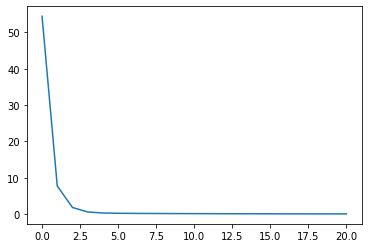

In [ ]:
obj.loss_val()